In [1]:
import pandas as pd
import sys
import numpy

sys.path.append('../')
from utils import clustering_utils, dataframe_utils

In [2]:
# MIN-MAX
# microarray = pd.read_csv('../TGNE/embedding/test_nn3_leiden_label_df_round_1.csv')
# rna_seq = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

# Z-SCORE
microarray = pd.read_csv('../TGNE/embedding/testz_nn3_leiden_label_df_round_1.csv')
rna_seq = pd.read_csv('../TGNE/embedding/rnaz_seq_label_df_round_1.csv')

In [3]:
ttherm_df = pd.read_csv('./tt.csv')

ttherm_df

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue
0,TTHERM_00056190,5.189470,6.273391,28.743073,1.408855e-11,1.536362e-07,16.614280,6.813506
1,TTHERM_00155590,-7.559635,7.502673,-28.170584,1.747377e-11,1.536362e-07,16.442169,6.813506
2,TTHERM_00261850,5.451140,9.935162,26.730080,3.063058e-11,1.536362e-07,15.985156,6.813506
3,TTHERM_00558440,5.836461,6.507954,26.512376,3.342751e-11,1.536362e-07,15.912948,6.813506
4,TTHERM_00196410,5.821084,7.582442,26.365846,3.546641e-11,1.536362e-07,15.863863,6.813506
...,...,...,...,...,...,...,...,...
22035,YF00011515.t1,0.000166,4.592647,0.000448,9.996507e-01,9.998241e-01,-7.264757,0.000076
22036,TTHERM_00142400,0.000085,8.514438,0.000386,9.996992e-01,9.998241e-01,-7.264757,0.000076
22037,YF00004363.t1,0.000136,12.075027,0.000342,9.997334e-01,9.998241e-01,-7.264757,0.000076
22038,YF00018736.t1,0.000061,5.346728,0.000204,9.998413e-01,9.998866e-01,-7.264757,0.000049


In [4]:
import numpy as np

def probability_from_bstat(b_stat):
    odds = np.exp(b_stat)
    
    probability = odds / (1 + odds)
    
    return probability

In [5]:
probability_from_bstat(1)

0.7310585786300049

In [6]:
ttherm_df['diff_exp_prob'] = ttherm_df['B'].apply(probability_from_bstat)

In [7]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
5863,TTHERM_00473020,0.940183,15.122643,4.179842,0.001588,0.005967,-1.627761,2.224263,0.164137
7703,TTHERM_00321730,0.942320,6.009840,3.288658,0.007362,0.021060,-3.196693,1.676544,0.039290
12891,TTHERM_00527180,0.256204,15.767071,1.649775,0.127646,0.218222,-5.945753,0.661102,0.002610
15828,TTHERM_00624720,0.155181,15.828200,1.037177,0.322246,0.448689,-6.707435,0.348055,0.001220
20226,TTHERM_01055600,0.041942,15.940924,0.280633,0.784278,0.854537,-7.222107,0.068269,0.000730


In [8]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
].to_csv('~/grls.csv')

In [9]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
[
'TTHERM_00378890',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00624720',
'TTHERM_00537380',
'TTHERM_01055600',
'TTHERM_00221120',
'TTHERM_00471040',
'TTHERM_00624730',
'TTHERM_01002870',
'TTHERM_00473020',
'TTHERM_01002860',
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
5863,TTHERM_00473020,0.940183,15.122643,4.179842,0.001588,0.005967,-1.627761,2.224263,0.164137
5914,TTHERM_00471040,0.759502,15.358669,4.149596,0.001670,0.006223,-1.680010,2.206034,0.157094
12891,TTHERM_00527180,0.256204,15.767071,1.649775,0.127646,0.218222,-5.945753,0.661102,0.002610
15828,TTHERM_00624720,0.155181,15.828200,1.037177,0.322246,0.448689,-6.707435,0.348055,0.001220
20226,TTHERM_01055600,0.041942,15.940924,0.280633,0.784278,0.854537,-7.222107,0.068269,0.000730


In [10]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120']
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
5863,TTHERM_00473020,0.940183,15.122643,4.179842,0.001588,0.005967,-1.627761,2.224263,0.164137
5914,TTHERM_00471040,0.759502,15.358669,4.149596,0.001670,0.006223,-1.680010,2.206034,0.157094
12891,TTHERM_00527180,0.256204,15.767071,1.649775,0.127646,0.218222,-5.945753,0.661102,0.002610
15828,TTHERM_00624720,0.155181,15.828200,1.037177,0.322246,0.448689,-6.707435,0.348055,0.001220
20226,TTHERM_01055600,0.041942,15.940924,0.280633,0.784278,0.854537,-7.222107,0.068269,0.000730


In [11]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
].shape

(5, 9)

In [12]:
FC = 1.5
logFC = numpy.log2(FC)
adj_P_Val = 0.0005
B = 1

ttherm_df_filtered = ttherm_df.loc[
    (ttherm_df['logFC'] > logFC)
    &
    (ttherm_df['adj.P.Val'] < adj_P_Val)
    &
    (ttherm_df['B'] > B)
].sort_values(by=('B'), ascending=False)

ttherm_df_filtered

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
0,TTHERM_00056190,5.189470,6.273391,28.743073,1.408855e-11,1.536362e-07,16.614280,6.813506,1.000000
2,TTHERM_00261850,5.451140,9.935162,26.730080,3.063058e-11,1.536362e-07,15.985156,6.813506,1.000000
3,TTHERM_00558440,5.836461,6.507954,26.512376,3.342751e-11,1.536362e-07,15.912948,6.813506,1.000000
4,TTHERM_00196410,5.821084,7.582442,26.365846,3.546641e-11,1.536362e-07,15.863863,6.813506,1.000000
5,TTHERM_01338520,4.723508,8.755741,25.961869,4.182473e-11,1.536362e-07,15.726481,6.813506,1.000000
...,...,...,...,...,...,...,...,...,...
3205,TTHERM_00666250,1.481709,6.469792,6.200531,7.166152e-05,4.926450e-04,1.599122,3.307466,0.831896
3209,TTHERM_01099240,2.376613,8.071728,6.199519,7.176249e-05,4.927244e-04,1.597648,3.307396,0.831689
3212,TTHERM_00947640,1.186816,11.966041,6.197856,7.192894e-05,4.934061e-04,1.595223,3.306795,0.831350
3217,TTHERM_00455660,1.377510,10.204512,6.191103,7.260879e-05,4.972958e-04,1.585378,3.303385,0.829965


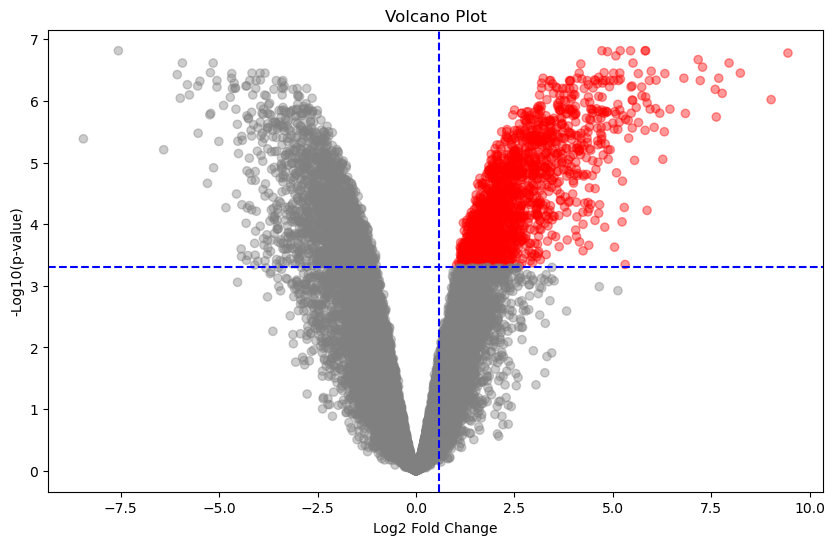

In [13]:
import matplotlib.pyplot as plt

# Define thresholds
fold_change_threshold = logFC  # Threshold for log2 fold change
pvalue_threshold = -np.log10(adj_P_Val)  # Threshold for p-value
b_value_threshold = B

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot: points with different colors for significance
# Color significant points differently
colors = np.where(
    (ttherm_df['logFC'] > fold_change_threshold)
    & 
    (ttherm_df['negLogPValue'] > pvalue_threshold)
    & 
    (ttherm_df['B'] > B), 
    'red', 
    'grey'
)

plt.scatter(
    ttherm_df['logFC'], 
    ttherm_df['negLogPValue'], 
    c=colors, 
    alpha=0.4,
)

# Add labels and title
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')

# Add horizontal and vertical threshold lines
plt.axhline(y=pvalue_threshold, color='blue', linestyle='--')
plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')

# # Annotate significant genes
# for i, row in ttherm_df.iterrows():
#     if (abs(row['log2FoldChange']) >= fold_change_threshold) and (row['pvalue'] <= pvalue_threshold):
#         plt.text(
#             row['log2FoldChange'], 
#             row['-log10(pvalue)'], 
#             row['Gene'], 
#             fontsize=8,
#             ha='right'
#         )

# Save the figure as an SVG file
plt.savefig('regranulation_volcano_plot.svg', format='svg')

# Show the plot
plt.show()

In [14]:
np.count_nonzero(colors == 'red')

1545

In [15]:
ttherm_df_filtered.to_csv(f'./de_regranulation_FC_{FC}_adj_P_Val_{adj_P_Val}_B_{B}.csv', index=False)

In [16]:
muco_exp_list = [
'TTHERM_00052190',
'TTHERM_00011710',
'TTHERM_00321680',
'TTHERM_00445920',
'TTHERM_00410180',
'TTHERM_00410210',
'TTHERM_00313130',
'TTHERM_00059370',
'TTHERM_00283800',
'TTHERM_00241790',
'TTHERM_00318900',
'TTHERM_00852790',
'TTHERM_00467390',
'TTHERM_01332070',
'TTHERM_00497590',
'TTHERM_00013410',
'TTHERM_00527180',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00378890',
'TTHERM_00522600',
'TTHERM_01055600',
'TTHERM_00558350',
'TTHERM_00221120',
'TTHERM_00572100',
'TTHERM_00420770',
'TTHERM_00566910',
'TTHERM_00658810',
'TTHERM_00047330',
'TTHERM_000193469',
'TTHERM_000486279',
'TTHERM_00141040',
'TTHERM_00227750',
'TTHERM_00317390',
'TTHERM_00670750',
'TTHERM_01122800',
'TTHERM_01213910',
'TTHERM_00886960',
'TTHERM_01287970',
'TTHERM_00498010',
]

In [17]:
len(muco_exp_list)

40

In [18]:
de_regranulation_df = pd.read_csv('./de_regranulation_FC_1.5_adj_P_Val_0.0005_B_1.csv')

In [19]:
de_muco = list(set(list(de_regranulation_df['Unnamed: 0'].values)).intersection(set(muco_exp_list)))
de = list(set(list(de_regranulation_df['Unnamed: 0'].values)) - set(muco_exp_list))
muco = list(set(muco_exp_list) - set(list(de_regranulation_df['Unnamed: 0'].values)))

In [20]:
de_regranulation_annot_df = pd.DataFrame({
    'TTHERM_ID': de_muco + de + muco,
    'mucocysts': ['DE,EV' for _ in range(len(de_muco))] + ['DE' for _ in range(len(de))] + ['EV' for _ in range(len(muco))],
    })

In [21]:
de_regranulation_annot_df

,TTHERM_ID,mucocysts
0,TTHERM_00670750,"DE,EV"
1,TTHERM_00410210,"DE,EV"
2,TTHERM_00317390,"DE,EV"
3,TTHERM_00558350,"DE,EV"
4,TTHERM_00445920,"DE,EV"
...,...,...
1556,TTHERM_00378890,EV
1557,TTHERM_00624720,EV
1558,TTHERM_00467390,EV
1559,TTHERM_01213910,EV


In [22]:
modified_annotation = pd.read_csv('../active_files/complete_annotation.csv')
modified_annotation_no_muco = modified_annotation.copy()

In [23]:
modified_annotation.head()

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,"ko00000,ko00001,ko01000,ko04121",-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj..."
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,"ko00000,ko00001,ko00002,ko01000",-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida..."
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and..."


In [24]:
modified_annotation = modified_annotation.merge(de_regranulation_annot_df, on='TTHERM_ID', how='outer')
modified_annotation

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description,mucocysts
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-,NaN
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj...",NaN
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-,NaN
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida...",NaN
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27168,TTHERM_000533949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
27169,YF00000038.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
27170,YF00006263.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
27171,YF00001895.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE


In [25]:
modified_annotation.isna().sum()

TTHERM_ID                   0
seed_ortholog             486
evalue                    486
score                     486
eggNOG_OGs                486
max_annot_lvl             486
COG_category              486
Description               486
Preferred_name            486
GOs                       486
EC                        486
KEGG_ko                   486
KEGG_Pathway              486
KEGG_Module               486
KEGG_Reaction             486
KEGG_rclass               486
BRITE                     486
KEGG_TC                   486
CAZy                      486
BiGG_Reaction             486
PFAMs                     486
TGD2021_description       486
peptide                   486
common_name               486
InterPro                  486
InterPro_description      486
mucocysts               25612
dtype: int64

In [26]:
modified_annotation = modified_annotation.fillna('-')

In [27]:
modified_annotation.isna().sum()

TTHERM_ID               0
seed_ortholog           0
evalue                  0
score                   0
eggNOG_OGs              0
max_annot_lvl           0
COG_category            0
Description             0
Preferred_name          0
GOs                     0
EC                      0
KEGG_ko                 0
KEGG_Pathway            0
KEGG_Module             0
KEGG_Reaction           0
KEGG_rclass             0
BRITE                   0
KEGG_TC                 0
CAZy                    0
BiGG_Reaction           0
PFAMs                   0
TGD2021_description     0
peptide                 0
common_name             0
InterPro                0
InterPro_description    0
mucocysts               0
dtype: int64

In [28]:
modified_annotation.to_csv('../active_files/complete_annotation.csv', index=False)

In [29]:
microarray_enrich = clustering_utils.compute_enrichment(microarray)

rna_seq_enrich = clustering_utils.compute_enrichment(rna_seq)

In [30]:
modified_annotation_no_muco.to_csv('../active_files/complete_annotation.csv', index=False)

In [31]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

rna_de = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])
microarray_de = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])

len(rna_ev), len(microarray_ev), len(rna_de), len(microarray_de)

(5, 5, 13, 17)

In [32]:
len(rna_ev.intersection(rna_de))

3

In [40]:
rna_ev

{617, 632, 634, 636, 679}

In [41]:
print(*['m'+str(m).zfill(3) for m in rna_ev], sep=', ')

m679, m617, m632, m634, m636


In [42]:
print(*['m'+str(m).zfill(3) for m in microarray_ev], sep=', ')

m424, m169, m171, m172, m174


In [43]:
(rna_ev.intersection(rna_de))

{617, 632, 634, 679}

In [44]:
print(*['m'+str(m).zfill(3) for m in rna_de], sep=', ')

m665, m677, m679, m170, m554, m559, m562, m443, m445, m062, m447, m448, m450, m068, m708, m459, m460, m461, m462, m464, m465, m466, m467, m596, m720, m725, m730, m475, m354, m617, m107, m632, m369, m625, m634, m376, m506, m639


In [45]:
len(microarray_ev.intersection(microarray_de))

3

In [46]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape

((43, 7), (51, 7))

In [47]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])].shape

((5, 7), (5, 7))

In [48]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,7.0,DE,differentially expressed in mucocyst regranula...,4.786406,1.155787e-05,12.0,41.0
0,12.0,DE,differentially expressed in mucocyst regranula...,3.947410,3.793164e-03,7.0,29.0
0,14.0,DE,differentially expressed in mucocyst regranula...,4.578995,1.626827e-03,7.0,25.0
0,25.0,DE,differentially expressed in mucocyst regranula...,2.601702,3.101038e-02,7.0,44.0
0,26.0,DE,differentially expressed in mucocyst regranula...,5.745843,2.985590e-13,26.0,74.0
0,27.0,DE,differentially expressed in mucocyst regranula...,3.577340,6.464601e-03,7.0,32.0
0,43.0,DE,differentially expressed in mucocyst regranula...,2.543886,3.431603e-02,7.0,45.0
0,49.0,DE,differentially expressed in mucocyst regranula...,2.861872,1.989969e-02,7.0,40.0
0,54.0,DE,differentially expressed in mucocyst regranula...,4.303567,1.308955e-02,5.0,19.0
0,59.0,DE,differentially expressed in mucocyst regranula...,2.803466,3.614343e-02,6.0,35.0


In [49]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,62.0,DE,differentially expressed in mucocyst regranula...,2.435636,4.159380e-02,7.0,47.0
0,68.0,DE,differentially expressed in mucocyst regranula...,3.028436,4.669620e-02,5.0,27.0
0,107.0,DE,differentially expressed in mucocyst regranula...,4.303567,1.308955e-02,5.0,19.0
0,170.0,DE,differentially expressed in mucocyst regranula...,3.028436,4.669620e-02,5.0,27.0
0,354.0,DE,differentially expressed in mucocyst regranula...,2.901437,2.450044e-03,11.0,62.0
0,369.0,DE,differentially expressed in mucocyst regranula...,3.270711,1.911381e-02,6.0,30.0
0,376.0,DE,differentially expressed in mucocyst regranula...,3.442853,4.121719e-03,8.0,38.0
0,443.0,DE,differentially expressed in mucocyst regranula...,2.803466,3.614343e-02,6.0,35.0
0,445.0,DE,differentially expressed in mucocyst regranula...,3.716717,2.275415e-02,5.0,22.0
0,447.0,DE,differentially expressed in mucocyst regranula...,2.973373,2.849758e-02,6.0,33.0


In [50]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,169.0,EV,experimentally validated mucocyst-associated gene,667.225000,1.561464e-09,4.0,4.0
1,171.0,EV,experimentally validated mucocyst-associated gene,142.976786,2.598162e-39,21.0,98.0
1,172.0,EV,experimentally validated mucocyst-associated gene,48.821341,1.679830e-03,3.0,41.0
1,174.0,EV,experimentally validated mucocyst-associated gene,51.325000,3.751447e-02,2.0,26.0
0,424.0,EV,experimentally validated mucocyst-associated gene,46.015517,4.201382e-02,2.0,29.0


In [51]:
print(','.join(['m'+str(int(m)).zfill(3) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m169,m171,m172,m174,m424


In [52]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
1,617.0,EV,experimentally validated mucocyst-associated gene,47.658929,4.051412e-02,2.0,28.0
1,632.0,EV,experimentally validated mucocyst-associated gene,44.481667,4.351344e-02,2.0,30.0
1,634.0,EV,experimentally validated mucocyst-associated gene,117.745588,1.352678e-09,6.0,34.0
0,636.0,EV,experimentally validated mucocyst-associated gene,129.738194,1.211057e-11,7.0,36.0
1,679.0,EV,experimentally validated mucocyst-associated gene,75.821023,5.176861e-07,5.0,44.0


In [53]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
1810,TTHERM_01302830,679
1811,TTHERM_01277506,679
1812,TTHERM_01213910,679
1813,TTHERM_01106040,679
1814,TTHERM_00938950,679
...,...,...
3793,TTHERM_00133640,617
3794,TTHERM_00129820,617
3795,TTHERM_00113000,617
3796,TTHERM_00077760,617


In [54]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
6772,TTHERM_01164066,424
6773,TTHERM_01107300,424
6774,TTHERM_00938880,424
6775,TTHERM_00894400,424
6776,TTHERM_00840140,424
...,...,...
14935,TTHERM_00011710,171
14963,TTHERM_01055600,169
14964,TTHERM_00624730,169
14965,TTHERM_00522600,169


In [55]:
print(','.join(['m'+str(int(m)).zfill(3) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m617,m632,m634,m636,m679


In [56]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
1810,TTHERM_01302830,679
1811,TTHERM_01277506,679
1812,TTHERM_01213910,679
1813,TTHERM_01106040,679
1814,TTHERM_00938950,679
...,...,...
3793,TTHERM_00133640,617
3794,TTHERM_00129820,617
3795,TTHERM_00113000,617
3796,TTHERM_00077760,617


In [57]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./rna_seq_ev_enriched_module_genes.csv', index=False)

In [58]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values

array([617., 632., 634., 636., 679.])

In [59]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
1,617.0,EV,experimentally validated mucocyst-associated gene,47.658929,4.051412e-02,2.0,28.0
1,632.0,EV,experimentally validated mucocyst-associated gene,44.481667,4.351344e-02,2.0,30.0
1,634.0,EV,experimentally validated mucocyst-associated gene,117.745588,1.352678e-09,6.0,34.0
0,636.0,EV,experimentally validated mucocyst-associated gene,129.738194,1.211057e-11,7.0,36.0
1,679.0,EV,experimentally validated mucocyst-associated gene,75.821023,5.176861e-07,5.0,44.0


In [60]:
[int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]

[617, 632, 634, 636, 679]

In [61]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./microarray_ev_enriched_module_genes.csv', index=False)

In [62]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

In [63]:
'select * from rna_seq_enrich where info LIKE "%ribo%"'

'select * from rna_seq_enrich where info LIKE "%ribo%"'

In [64]:
dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select * from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)

,module,term,info,fold_change,bonferroni,term_count,module_size
51,612.0,J,"Translation, ribosomal structure and biogenesis",9.835274,6.960593e-03,5.0,32.0
50,492.0,ko:K04373,ribosomal protein S6 kinase alpha-1/2/3/6,55.085655,1.374761e-06,6.0,51.0
49,425.0,J,"Translation, ribosomal structure and biogenesis",13.769384,4.807845e-05,7.0,32.0
48,279.0,ko:K04373,ribosomal protein S6 kinase alpha-1/2/3/6,29.264254,2.822320e-02,3.0,48.0
47,250.0,GO:0043232,Intracellular non-membrane-bounded organelle: ...,21.742566,4.667892e-08,10.0,25.0
46,250.0,GO:0043229,Intracellular organelle: Organized structure o...,8.130693,2.393507e-04,10.0,25.0
45,250.0,GO:0043228,Non-membrane-bounded organelle: Organized stru...,21.610526,4.926892e-08,10.0,25.0
44,250.0,GO:0043226,Organelle: Organized structure of distinctive ...,7.960925,2.860001e-04,10.0,25.0
43,250.0,GO:0006996,Organelle organization: A process that is carr...,17.661838,3.207070e-06,9.0,25.0
42,245.0,J,"Translation, ribosomal structure and biogenesis",10.746836,2.673738e-04,7.0,41.0


In [65]:
print(', '.join([f'm{str(int(mod)).zfill(3)}' for mod in (dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select distinct(module) from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)['module'].values)]))

m612, m492, m425, m279, m250, m245, m239, m220, m218, m216, m202, m154, m099, m097, m096, m090, m084, m074


In [66]:
rna_ev

{617, 632, 634, 636, 679}

In [67]:
muco_exp = set(muco_exp_list)

In [68]:
# ttherm_df_filtered = ttherm_df_filtered.loc[
#     (ttherm_df_filtered['diff_exp_prob'] > 0.9)
# ]
# ttherm_df_filtered

In [69]:
print(','.join(list(ttherm_df_filtered['Unnamed: 0'].values)))

TTHERM_00056190,TTHERM_01127520,TTHERM_00261850,TTHERM_00558440,TTHERM_00196410,TTHERM_01338520,TTHERM_00188500,TTHERM_00516395,TTHERM_00481170,TTHERM_00822150,TTHERM_01014580,TTHERM_00239350,TTHERM_01002630,TTHERM_00285550,TTHERM_01043140,TTHERM_00227130,TTHERM_00480150,TTHERM_00666210,TTHERM_00845880,TTHERM_00516330,TTHERM_00011660,TTHERM_01161080,TTHERM_01084400,TTHERM_00989430,TTHERM_00730330,TTHERM_00532720,TTHERM_00402020,TTHERM_00137740,TTHERM_00600240,TTHERM_00999152,TTHERM_01143870,TTHERM_01080440,TTHERM_00290740,TTHERM_00299979,TTHERM_00193820,TTHERM_00842410,TTHERM_00194210,TTHERM_00047020,TTHERM_00437690,TTHERM_00462890,TTHERM_00339900,TTHERM_00133760,TTHERM_00348960,TTHERM_00713420,TTHERM_00256990,TTHERM_00301830,TTHERM_01043130,TTHERM_00624120,TTHERM_00040350,TTHERM_00338350,TTHERM_01495770,TTHERM_01349994,TTHERM_00320460,TTHERM_00361750,TTHERM_00545770,TTHERM_01312368,TTHERM_00522740,TTHERM_00467430,TTHERM_00344200,TTHERM_00338490,TTHERM_01085670,TTHERM_00640030,TTHERM_0

In [70]:
# len(inter)

In [71]:
# print(','.join(inter))

In [72]:
# import requests
# from bs4 import BeautifulSoup

# def extract_descriptions_from_html(url):
#     try:
#         # Get the HTML content of the web page
#         response = requests.get(url)
#         response.raise_for_status()  # Check if the request was successful
#         html_content = response.content

#         # Parse the HTML content using BeautifulSoup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find the specific table with class 'main'
#         table = soup.find('table', class_='main')
#         if table:
#             # Find all rows in the table, skipping the header row
#             rows = table.find_all('tr')[1:]  # Skip the header row
#             descriptions = []

#             for row in rows:
#                 # Find all cells in the row
#                 cells = row.find_all('td')
#                 if len(cells) >= 4:
#                     description_text = cells[3].get_text(strip=True)
#                     descriptions.append(description_text)
            
#             if descriptions:
#                 for idx, description in enumerate(descriptions, 1):
#                     print(f"Description {idx}: {description}")
#             else:
#                 print("No descriptions found.")
#         else:
#             print("Table not found in the HTML.")

#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred while fetching the HTML content: {e}")

# for gene in inter:
#     url = f"https://tet.ciliate.org/search.php?gene_name={gene}"  # Replace with the actual URL
#     extract_descriptions_from_html(url)

In [73]:
import scipy.stats as stats

# Total number of genes in the entire dataset
N = 20000

# Total number of specific genes you are interested in
K = 50

# Number of genes randomly selected
n = 5000

# Number of specific genes found in the selected set
k = 50

# Hypergeometric test
p_value = stats.hypergeom.sf(k-1, N, K, n)

print(f"The p-value is: {p_value}")

The p-value is: 6.559457458892222e-31


In [74]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 78
b = 1300
c = 16000
d = 16000

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

# One-tailed test (greater)
oddsratio, p_value_greater = stats.fisher_exact(table, alternative='greater')
print(f"One-tailed p-value (greater): {p_value_greater}")

# One-tailed test (less)
oddsratio, p_value_less = stats.fisher_exact(table, alternative='less')
print(f"One-tailed p-value (less): {p_value_less}")

Two-tailed p-value: 6.555352598579253e-277
One-tailed p-value (greater): 1.0
One-tailed p-value (less): 5.971977437724528e-277


In [75]:
from scipy.stats import chi2_contingency

# Create a 2x2 contingency table (example data)
# Replace with your actual observed counts
a = 78
b = 1300
c = 20000
d = 20000

observed = [[a, b], [c, d]]

# Perform Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 1046.7116189215628
P-value: 1.2620381730596847e-229
Degrees of Freedom: 1
Expected Frequencies:
[[  668.65203731   709.34796269]
 [19409.34796269 20590.65203731]]


In [76]:
# all_ttherm_df = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

In [77]:
# counts = []

# for i in range(10000):
#     counts.append(len(set(all_ttherm_df.sample(4000)['TTHERM_ID'].values).intersection(set(inter))))

In [78]:
# import matplotlib.pyplot as plt

# plt.hist(counts, 10)
# plt.show()

In [79]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 26
b = 1934
c = 13
d = 17027

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

Two-tailed p-value: 4.1016327983861445e-17


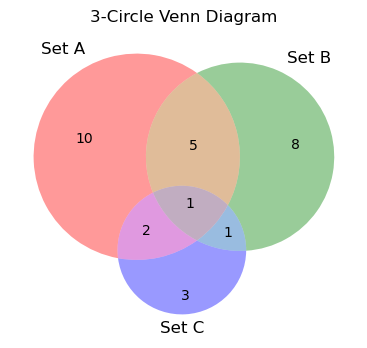

In [80]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(8, 4))
venn3(subsets=(10, 8, 5, 3, 2, 1, 1), set_labels=('Set A', 'Set B', 'Set C'))
plt.title("3-Circle Venn Diagram")
plt.show()

In [81]:
rna_seq_ev_enriched_df = rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [82]:
microarray_ev_enriched_df = microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [83]:
# import matplotlib.pyplot as plt
# from venn import venn

# # Define the sets
# sets = {
#     'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
#     'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
#     'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
# }

# # Create the Venn diagram
# v = venn(sets, legend_loc='upper center', ax=None, figsize=(10, 50))

# plt.savefig('muco_venn.svg', format='svg')

# plt.show()

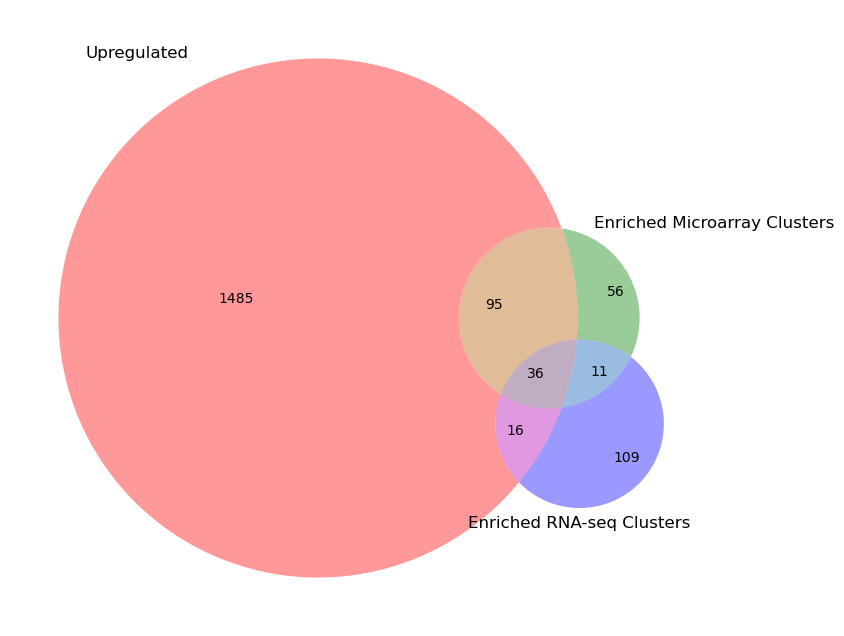

In [84]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sets
sets = {
    'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
    'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
    'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
}

# Create the Venn diagram with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here as needed

# Create a 3-set Venn diagram
v = venn3([sets['Upregulated'], sets['Enriched Microarray Clusters'], sets['Enriched RNA-seq Clusters']],
          ('Upregulated', 'Enriched Microarray Clusters', 'Enriched RNA-seq Clusters'),
          ax=ax)

# Save the plot in SVG format
plt.savefig('muco_venn.svg', format='svg')

# Display the plot
plt.show()

In [85]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))

In [86]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))
intersection_enriched = (set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_dem = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_der = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all

In [87]:
len(intersection_all), len(intersection_enriched), len(intersection_dem), len(intersection_der)

(36, 11, 95, 16)

In [88]:
print(f'{len(intersection_all)} gene intersection between all gene groups:')
print(*sorted(intersection_all), sep=', ')

print(f'{len(intersection_enriched)} gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:')
print(*sorted(intersection_enriched), sep=', ')

print(f'{len(intersection_dem)} gene intersection between the differentially expressed genes and the genes in the microarray enriched clusters:')
print(*sorted(intersection_dem), sep=', ')

print(f'{len(intersection_der)} gene intersection between the differentially expressed genes and the genes in the RNA-seq enriched clusters:')
print(*sorted(intersection_der), sep=', ')

36 gene intersection between all gene groups:
TTHERM_00011710, TTHERM_00047330, TTHERM_00052190, TTHERM_00059370, TTHERM_00145480, TTHERM_00187110, TTHERM_00193465, TTHERM_00218690, TTHERM_00227750, TTHERM_00241790, TTHERM_00283760, TTHERM_00312200, TTHERM_00313130, TTHERM_00314860, TTHERM_00317390, TTHERM_00321680, TTHERM_00321720, TTHERM_00390080, TTHERM_00420770, TTHERM_00445920, TTHERM_00486275, TTHERM_00522740, TTHERM_00585170, TTHERM_00592740, TTHERM_00630030, TTHERM_00649180, TTHERM_00670750, TTHERM_00685980, TTHERM_00713420, TTHERM_00773710, TTHERM_00787390, TTHERM_00938950, TTHERM_01049340, TTHERM_01106040, TTHERM_01213910, TTHERM_01321550
11 gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:
TTHERM_00038880, TTHERM_00221120, TTHERM_00378890, TTHERM_00522600, TTHERM_00527180, TTHERM_00537380, TTHERM_00624720, TTHERM_00624730, TTHERM_01002860, TTHERM_01002870, TTHERM_01055600
95 gene intersection between the differentially

In [89]:
print(*intersection_enriched.intersection(set([
'TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',
])), sep=', ')

TTHERM_00527180, TTHERM_00624720, TTHERM_00624730, TTHERM_01055600, TTHERM_00378890, TTHERM_00522600


In [90]:
len(intersection_enriched.intersection(set(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',])))

6

In [91]:
lx = 17.980
ly = 22.034

In [92]:
fx = 12.709
fy = 21.085

In [93]:
fx - lx 

-5.271000000000001

In [94]:
fy - ly 

-0.9489999999999981

In [95]:
108.552 - (-5.271) # x

113.82300000000001

In [96]:
113.166 - (-0.949) # y

114.115

In [97]:
len(intersection_all), len(muco_exp)

(36, 40)

In [98]:
len(intersection_all.intersection(muco_exp))

13

In [99]:
print(*intersection_all.intersection(muco_exp), sep=', ')

TTHERM_00670750, TTHERM_01213910, TTHERM_00321680, TTHERM_00047330, TTHERM_00059370, TTHERM_00420770, TTHERM_00445920, TTHERM_00052190, TTHERM_00241790, TTHERM_00313130, TTHERM_00011710, TTHERM_00227750, TTHERM_00317390


In [100]:
z = ['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370']

In [101]:
len(intersection_all.intersection(muco_exp).intersection(z))

12

In [102]:
print(*intersection_all.intersection(muco_exp).intersection(z), sep=', ')

TTHERM_00670750, TTHERM_01213910, TTHERM_00321680, TTHERM_00047330, TTHERM_00059370, TTHERM_00420770, TTHERM_00445920, TTHERM_00052190, TTHERM_00241790, TTHERM_00011710, TTHERM_00227750, TTHERM_00317390


In [103]:
len(set(['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370'
]).intersection(set(['TTHERM_00420770', 'TTHERM_00227750', 'TTHERM_00317390', 'TTHERM_01213910', 'TTHERM_00011710', 'TTHERM_00321680', 'TTHERM_00241790', 'TTHERM_00670750', 'TTHERM_00052190', 'TTHERM_00047330', 'TTHERM_00059370', 'TTHERM_00445920'
])))

12

In [104]:
len(set(
['TTHERM_00193465',
'TTHERM_00592740',
'TTHERM_01049340',
'TTHERM_01213910',
'TTHERM_00145480',
'TTHERM_00420770',
'TTHERM_00787390',
'TTHERM_00059370',
'TTHERM_01321550',
'TTHERM_00522740',
'TTHERM_00313130',
'TTHERM_00649180',
'TTHERM_00312200',
'TTHERM_00241790',
'TTHERM_00321720',
'TTHERM_00585170',
'TTHERM_00321680',
'TTHERM_00011710',
'TTHERM_00630030',
'TTHERM_00047330',
'TTHERM_00773710',
'TTHERM_00685980',
'TTHERM_00486275',
'TTHERM_00938950',
'TTHERM_00317390',
'TTHERM_00218690',
'TTHERM_00713420',
'TTHERM_00445920',
'TTHERM_00314860',
'TTHERM_00227750',
'TTHERM_00390080',
'TTHERM_00052190',
'TTHERM_00187110',
'TTHERM_00670750',
'TTHERM_01106040',
'TTHERM_00283760',]
).intersection(set(
['TTHERM_00187110',
'TTHERM_00193465',
'TTHERM_00314860',
'TTHERM_00630030',
'TTHERM_00938950',
'TTHERM_00522740',
'TTHERM_00787390',
'TTHERM_00649180',
'TTHERM_00445920',
'TTHERM_00317390',
'TTHERM_00713420',
'TTHERM_00486275',
'TTHERM_00313130',
'TTHERM_00241790',
'TTHERM_01106040',
'TTHERM_00283760',
'TTHERM_01321550',
'TTHERM_00685980',
'TTHERM_01213910',
'TTHERM_00390080',
'TTHERM_00312200',
'TTHERM_00670750',
'TTHERM_00227750',
'TTHERM_01049340',
'TTHERM_00218690',
'TTHERM_00321720',
'TTHERM_00592740',
'TTHERM_00059370',
'TTHERM_00052190',
'TTHERM_00047330',
'TTHERM_00321680',
'TTHERM_00585170',
'TTHERM_00420770',
'TTHERM_00011710',
'TTHERM_00145480',
'TTHERM_00773710',]
)))

36